In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train1.csv')

In [4]:
# Checking the head or tail gives an insight into the data organisation
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#                 CLEANING DATA

In [6]:

# Before data cleaning we should check for the the data info. 
# Date_name.info() describe the data types as it was stored either in floats,integers or strings format.
# Furthermore NaN as  a float dtype.
# Lastly we can use .unique() to check for unique values.


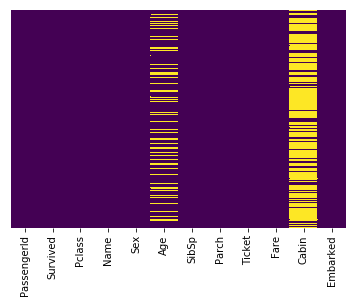

In [7]:
# BASIC TRICK: A heatmap is created to identify the missing values or, 
#  checking with Boolean(True or False) is effective for small dataset.
sns.heatmap(train.isnull(),yticklabels= False, cbar= False,cmap='viridis')

In [8]:
# for the result we can see that that the boolean result is cumbersome in identification of missing values.
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
# form the heatmap we could identify the missing values.
# Rather droping off the missing columns.
# we fill them up buy their average.

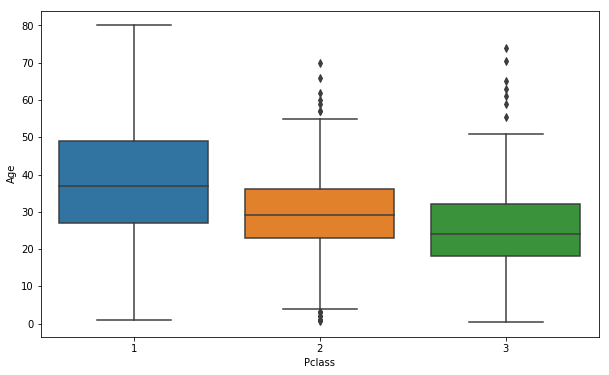

In [10]:
#      AGE COLUMN

plt.figure(figsize=(10,6))
sns.boxplot(y= 'Age', x = 'Pclass', data= train) 

In [11]:
# filling the 'Age' missing values according to Passenger classes by,
# using a python function 


def impute_age(cols):
    
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis= 1) # we cast and apply the function to the dataframe

In [13]:
train.describe() # checking for changes

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


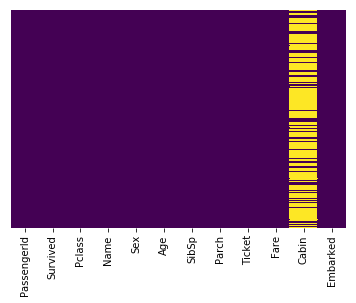

In [14]:
sns.heatmap(train.isna(),yticklabels=False, cbar= False, cmap= 'viridis') # cheaking for changes

In [15]:
#     NEXT: CABIN COLUMN

# The cabin column values is a combination of letters and numbers.
# The above technique cannot be adopted when there are to many missing values.
# Droping the 'cabin' column will be appropriate. 

train.drop('Cabin', axis=1, inplace= True)

In [16]:
train.count() # 'Embarked' has missing values

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

In [17]:
train.dropna(inplace= True) # the 'dropna()' helps to takecare of any unidentified missing values.

In [18]:
train.count() # quick check...

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

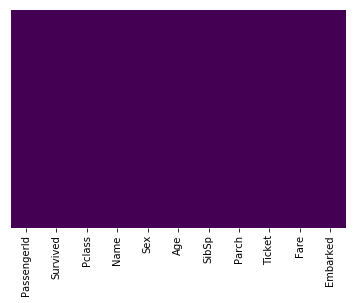

In [19]:
sns.heatmap(train.isna(),yticklabels=False, cbar= False, cmap= 'viridis') # cheaking for changes

In [20]:
#      MACHINE LEARNING 

In [21]:
# When dealing with categorical varaibles, we need to convert this categories varibles in to readable language.
# By do so in machine learning we need to creating a dummy vaiarable
# dummy variable is assigning 0 or 1 to the categorical variable
# note, we cannot use casting...

In [22]:
# Next: we take note of multicollinearity (MC)
# This is when a column can prefect predict another column
# To slove this problem we have to introdue the 'drop_first= True'

Sex= pd.get_dummies(train['Sex'], drop_first= True) # There are two categories 'male' and 'female'
Sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [23]:

Embark = pd.get_dummies(train['Embarked'], drop_first= True) #There are two categories 'C', 'Q' and 'S'
Embark.head()



,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
train= pd.concat([train, Sex, Embark], axis= 1) #pd.concat means, adding to the data frame

In [25]:
train.head(2) # quick check...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [26]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'PassengerId'], axis= 1, inplace= True )#drop off all uncoded categories

In [27]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
# why logistic regression: it reads categories.
# linear regression: processes continuous variables 
# Logistic regression try to fit the graph on its points. LinearReg takes the best fitted point across the scattered points
# Introducing the sigmund function helps to minimize error of bias trade off between overfitting and underfitting.
# This is usually performed by the Sigmund funtion which fits the logisticReg points into a probablity of 0 and 1

In [29]:
# Logistic_Regression(without Pclass as dummy varaible)

In [30]:
X=train.drop('Survived', axis= 1)

y= train['Survived']

In [31]:
from sklearn.cross_validation import train_test_split

/Users/tundeojutiku/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 101)

In [33]:
from sklearn.linear_model import LogisticRegression 

In [34]:
logmodel= LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
predictions= logmodel.predict(X_test)


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, predictions ))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [39]:
from sklearn.metrics import confusion_matrix


In [40]:
confusion_matrix (y_test, predictions )

array([[148,  15],
       [ 36,  68]])

In [41]:
# making comparism of when all categories  in the df are coded into dummies 

Pclass = pd.get_dummies(train['Pclass'], drop_first= True)
print (Pclass.head(2))
train= pd.concat([train, Pclass], axis= 1)
train.drop('Pclass', axis= 1, inplace= True)
train.head()

   2  3
0  0  1
1  0  0


,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [42]:
 #  Logistic_Regression (with Pclass as dummy varaible)

In [59]:

    
X=train.drop('Survived', axis= 1)
y= train['Survived']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 101)
from sklearn.linear_model import LogisticRegression 
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train )
predictions= logmodel.predict(X_test)
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, predictions ))
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix (y_test, predictions )
print('Confusion Matrix:')
print(c_m)

Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.92      0.86       163
          1       0.84      0.65      0.74       104

avg / total       0.82      0.82      0.81       267

Confusion Matrix:
[[150  13]
 [ 36  68]]


In [44]:
# The model precision is appx. 82% When all categories are properly checked.
# and appx. 81% when the Pclass was not converted or recoded.
# n = total number in the array 
# Using the confusion matrix: (150+68)/267 = 0.816 = appx. 82%